# Data Analytics Technical Challenge

Tricked-out cars use gas with a high cetane index, like unleaded 98 petrol in order to avoid delay/advancing in combustible injection (avoiding connecting rod pitting ), but we have started to embrace petrols that add ethanol in their formula, as they are cheaper and they use the same cetane index as more expensive petrol. Without going into further detail (we could write an actual book about this) we think that going green and being modern can be very expensive, as we have seen that cars use more petrol than they used to for each trip.

Your challenge starts here 📈
Now it is your turn: can you help us find the best combustible? We have saved some consumption data in a .csv, but… it would be very nice if you could add some more data. You can find data in the repo :-)

In [90]:
import pandas as pd

In [3]:
df1 = pd.read_csv('https://raw.githubusercontent.com/nlewism/technical_challenge_DA/master/data/measurements.csv')
df2 = pd.read_excel('/Users/natalielewis/Desktop/Ironhack/measurements2.xlsx')

## Exploring

In [4]:
df1

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [34]:
df1['gas_type'].value_counts()

gas_type
SP98    228
E10     160
Name: count, dtype: int64

In [47]:
df1['specials'].value_counts()

specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: count, dtype: int64

In [55]:
df1['refill gas'].value_counts()

refill gas
SP98    8
E10     5
Name: count, dtype: int64

In [ ]:
df1.isnull()

In [ ]:
df2.isnull()

In [79]:
df2['refill gas'].isna().sum()

375

#### Cleaning

In [5]:
df2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [6]:
# One-hot-encoding for specials column

df2['specials']=df2['specials'].replace({'sun ac':'AC, sun','AC Sun':'AC, sun','AC, Sun':'AC, sun','AC sun':'AC, sun','ac':'AC','AC rain':'AC, rain','ac rain':'AC, rain','half rain half sun': 'rain, sun','AC snow':'AC, snow'})

In [7]:
df2['specials'].value_counts()

specials
rain         32
sun          27
AC           14
AC, rain     10
AC, sun       5
snow          3
AC, snow      1
rain, sun     1
Name: count, dtype: int64

In [8]:
df2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [9]:
df2.drop(columns=['rain','sun','AC'], inplace=True)

In [10]:
df2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,NaN,NaN
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,NaN,NaN


In [11]:
encoded_df = df2['specials'].str.get_dummies(', ')

In [12]:
encoded_df

,AC,rain,snow,sun
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
383,0,0,0,0
384,1,0,0,0
385,0,0,0,0
386,1,0,0,0


In [13]:
df2 = pd.concat([df2,encoded_df],axis=1)

In [14]:
df2.drop(columns=['specials'],inplace=True)

In [15]:
df2

,distance,consume,speed,temp_inside,temp_outside,gas_type,refill liters,refill gas,AC,rain,snow,sun
0,28.0,5.0,26,21.5,12,E10,45.0,E10,0,0,0,0
1,12.0,4.2,30,21.5,13,E10,NaN,NaN,0,0,0,0
2,11.2,5.5,38,21.5,15,E10,NaN,NaN,0,0,0,0
3,12.9,3.9,36,21.5,14,E10,NaN,NaN,0,0,0,0
4,18.5,4.5,46,21.5,15,E10,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,NaN,NaN,0,0,0,0
384,16.1,4.3,38,25.0,31,SP98,NaN,NaN,1,0,0,0
385,16.0,3.8,45,25.0,19,SP98,NaN,NaN,0,0,0,0
386,15.4,4.6,42,25.0,31,SP98,NaN,NaN,1,0,0,0


## Finding the "best" combustible using df2
- Fuel Efficiency (Miles per Gallon, MPG): Calculate the average miles per gallon for each gas type. Higher MPG indicates better fuel efficiency.

- Fuel Consumption Rate: Calculate the average fuel consumption rate (e.g., liters per 100 km) for each gas type. Lower consumption rates indicate greater efficiency.

- Refill Frequency: Analyze the average frequency of refills for each gas type. Fewer refills may indicate better efficiency and convenience for drivers.

- Variability in Performance: Assess the consistency of performance (e.g., fuel efficiency) for each gas type across different driving conditions (e.g., AC on/off, rain/snow/sun). Lower variability may indicate a more reliable option.

### Fuel Efficiency

In [ ]:
# Converting distance from km to miles (1 km = 0.621371 miles)
df['distance_miles'] = df['distance'] * 0.621371
df['consumed_per_100m'] = df['consume'] * 0.264172
df['MPG'] = df['distance_miles'] / df['consumed_per_100m']

### Fuel Consumption Rate:

In [26]:
df2['consumption_rate'] = (df2['consume']/df2['distance'])*100

#### Gas type E10 has a lower consumption rate, which indicates greater efficiency.

### Refill Frequency:

In [102]:
refill_frequency = pd.DataFrame(df2.groupby('refill gas').size().reset_index(name='refill_count'))

In [103]:
refill_frequency

,refill gas,refill_count
0,E10,5
1,SP98,8


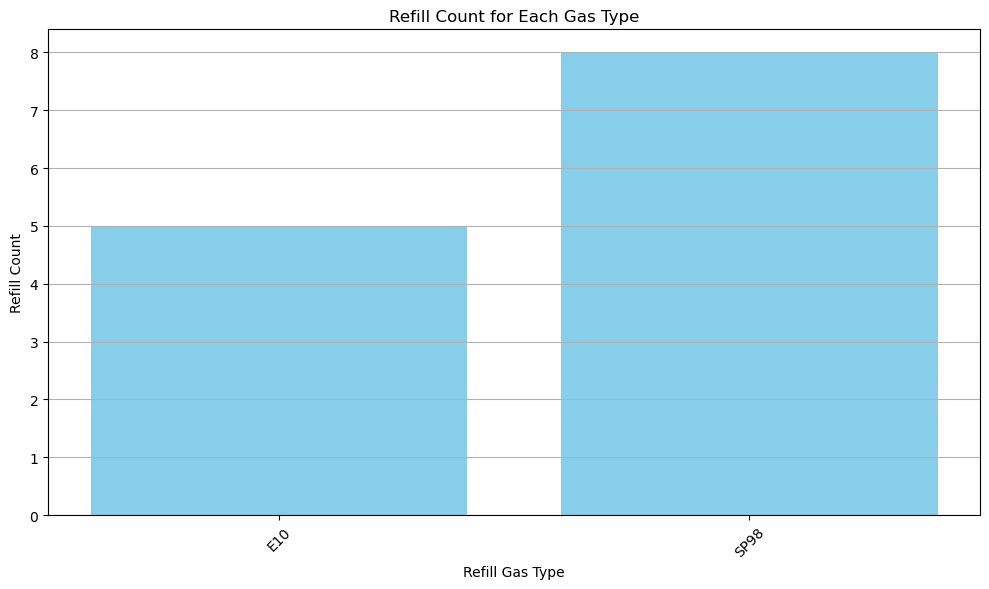

In [104]:
# Visualizing Refill Frequency == Bar Plot

plt.figure(figsize=(10, 6))
plt.bar(refill_frequency['refill gas'], refill_frequency['refill_count'], color='skyblue')
plt.xlabel('Refill Gas Type')
plt.ylabel('Refill Count')
plt.title('Refill Count for Each Gas Type')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Gas E10 has fewer refills which may indicate better efficiency and convenience for drivers.

### Variability in Performance: 

In [111]:
variability_df

,Gas Type,Lowest_MPG_dev,Highest_MPG_dev
0,E10,0.455213,45.398622
1,SP98,0.774416,21.690273


In [112]:
v_performance = pd.DataFrame(variability_performance2)

In [114]:
v_performance

,gas_type,AC,rain,snow,sun,MPG_dev
0,E10,0,0,0,0,9.504523
1,E10,0,0,0,1,4.599092
2,E10,0,1,0,0,5.120029
3,E10,1,0,0,0,45.398622
4,E10,1,0,0,1,25.086873
5,E10,1,0,1,0,NaN
6,E10,1,1,0,0,0.455213
7,SP98,0,0,0,0,10.285752
8,SP98,0,0,0,1,21.690273
9,SP98,0,0,1,0,0.954765


In [110]:
variability_performance2

,gas_type,AC,rain,snow,sun,MPG_dev
0,E10,0,0,0,0,9.504523
1,E10,0,0,0,1,4.599092
2,E10,0,1,0,0,5.120029
3,E10,1,0,0,0,45.398622
4,E10,1,0,0,1,25.086873
5,E10,1,0,1,0,NaN
6,E10,1,1,0,0,0.455213
7,SP98,0,0,0,0,10.285752
8,SP98,0,0,0,1,21.690273
9,SP98,0,0,1,0,0.954765


In [41]:
min_indices = variability_performance2.groupby('gas_type')['MPG_dev'].idxmin()
max_indices = variability_performance2.groupby('gas_type')['MPG_dev'].idxmax()


In [44]:
min_indices

gas_type
E10      6
SP98    13
Name: MPG_dev, dtype: int64

In [45]:
max_indices

gas_type
E10     3
SP98    8
Name: MPG_dev, dtype: int64

#### Gas type E10 has lower variability which suggests that the gas type tends to perform more reliably in terms of fuel efficiency under various circumstances.